In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sn
from datetime import datetime

In [67]:
#sample = pd.read_csv('G_PSQL_data/JAN_sample_raw.txt')
sample.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [72]:
sample.drop(columns=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time'], inplace=True)

In [66]:
sample['dep_time'] = pd.to_datetime(sample['dep_time'], format='%H%M', errors='coerce')
sample['arr_time'] = pd.to_datetime(sample['arr_time'], format='%H%M', errors='coerce')
sample

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,NK,NK,NK,955,NK,N507NK,955,12892,LAX,...,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,AA,AA_CODESHARE,AA,5216,OH,N256PS,5216,11278,DCA,...,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,AA,AA_CODESHARE,AA,5225,OH,N594NN,5225,11057,CLT,...,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,AA,AA_CODESHARE,AA,5227,OH,N573NN,5227,11057,CLT,...,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,NK,NK,NK,811,NK,N640NK,811,13204,MCO,...,1189,3.0,0.0,14.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112187,2018-01-31,DL,DL_CODESHARE,DL,5786,CP,N622CZ,5786,12892,LAX,...,834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112188,2018-01-31,DL,DL_CODESHARE,DL,5793,CP,N610CZ,5793,12889,LAS,...,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112189,2018-01-31,DL,DL_CODESHARE,DL,5798,CP,N606CZ,5798,14747,SEA,...,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112190,2018-01-31,DL,DL_CODESHARE,DL,5811,CP,N628CZ,5811,14747,SEA,...,1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
sample.to_csv('JAN_sample.csv')

In [53]:
delayed = sample[sample['arr_delay'] > 0]
early = sample[sample['arr_delay'] < 0]

In [54]:
early = early.dropna()
delayed = delayed.dropna()

In [18]:
early = early.groupby('branded_code_share', as_index=False)['arr_delay'].mean()

In [19]:
delayed = delayed.groupby('branded_code_share', as_index=False)['arr_delay'].mean()

In [30]:
early.rename(columns={'arr_delay': 'ed'}, inplace=True)

In [32]:
both = early.merge(delayed)

In [34]:
both['avg'] = (both['arr_delay'] + both['ed']) / 2

In [45]:
both['branded_code_share'].replace({'AA_CODESHARE': 'AA', 'AS_CODESHARE': 'AS', 'DL_CODESHARE': 'DL', 'HA_CODESHARE': 'HA', 'UA_CODESHARE': 'UA'}, inplace=True)

In [51]:
both = both.groupby('branded_code_share', as_index=False).mean()

In [75]:
nulls = sample.isnull().sum()
nulls / len(sample) * 100

fl_date                0.0
mkt_unique_carrier     0.0
branded_code_share     0.0
mkt_carrier            0.0
mkt_carrier_fl_num     0.0
op_unique_carrier      0.0
tail_num               0.0
op_carrier_fl_num      0.0
origin_airport_id      0.0
origin                 0.0
origin_city_name       0.0
dest_airport_id        0.0
dest                   0.0
dest_city_name         0.0
crs_dep_time           0.0
dep_time               0.0
dep_delay              0.0
taxi_out               0.0
wheels_off             0.0
wheels_on              0.0
taxi_in                0.0
crs_arr_time           0.0
arr_time               0.0
arr_delay              0.0
cancelled              0.0
diverted               0.0
crs_elapsed_time       0.0
actual_elapsed_time    0.0
air_time               0.0
distance               0.0
dtype: float64

In [74]:
sample = sample.dropna()

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

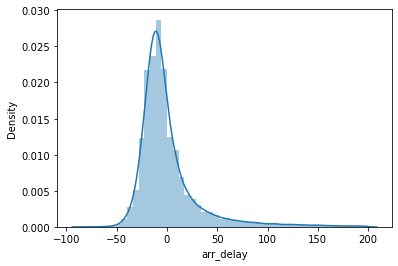

In [85]:
sn.distplot(sample['arr_delay'])

In [87]:
from functions import rename_brand_code
sample = rename_brand_code(sample)

In [88]:
sample.to_csv('sample_no_outliers.csv')

In [94]:
blah = {code:sample[sample['branded_code_share'] == code].arr_delay for code in set(sample['branded_code_share'])}

In [95]:
blah

{'DL': 58       -11.0
 59        -8.0
 60       -22.0
 61       -32.0
 66       -15.0
           ... 
 112182    64.0
 112183   -21.0
 112184    -7.0
 112188    -7.0
 112191   -12.0
 Name: arr_delay, Length: 23264, dtype: float64,
 'F9': 1235      -5.0
 1236     -17.0
 1237      27.0
 1238      36.0
 1239      -9.0
           ... 
 112046   -16.0
 112047     2.0
 112048     2.0
 112063     1.0
 112064   -17.0
 Name: arr_delay, Length: 1745, dtype: float64,
 'VX': 58119      5.0
 58120    -30.0
 58121    -29.0
 58122     -8.0
 58123    -26.0
           ... 
 112027   -16.0
 112028   -11.0
 112029   -11.0
 112030   -18.0
 112031   -27.0
 Name: arr_delay, Length: 483, dtype: float64,
 'NK': 0         -6.0
 4         17.0
 5          1.0
 6        -21.0
 7         22.0
           ... 
 111997   -25.0
 111998   -11.0
 111999   -10.0
 112000    -9.0
 112001    -6.0
 Name: arr_delay, Length: 2530, dtype: float64,
 'UA': 101       10.0
 102       19.0
 103      -18.0
 104       -3.0
 105      

In [99]:
st.f_oneway(blah['DL'], blah['AS'], blah['HA'], blah['WN'], blah['B6'], blah['G4'], blah['AA'], blah['UA'], blah['NK'], blah['VX'], blah['F9'])

F_onewayResult(statistic=75.84080953436685, pvalue=6.523278046273461e-156)

In [101]:
len(set(sample['tail_num']))

5922